# **数据分析及实践 Lab 3**

### **PART 1**

使用 `pandas` 库的相关方法，进行数据集读取、信息处理和探索性分析。

##### **Q1**
读取数据集 `data.csv`（将首列作为索引）至变量 `df`，展示该数据集的前 10 行内容，并展示数据集有多少行和多少列。

In [67]:
import pandas as pd

# 读取数据集至变量 df
df = pd.read_csv('data.csv', index_col=0)

# 展示该数据集的前 10 行内容
print("1) The first 10 rows of data:\n")
print(df.head(10))

# 展示数据集有多少行和多少列
print("\n2) The number of rows in the data set:", df.shape[0])
print("\n3) The number of columns in the data set:", df.shape[1])

1) The first 10 rows of data:

    CNTRYID  CNT  CNTSCHID   CYC  NatCen  Region  STRATUM  SUBNATIO  OECD  \
1         8  ALB    800002  07MS     800     800  ALB0109     80000     0   
2         8  ALB    800003  07MS     800     800  ALB0109     80000     0   
3         8  ALB    800004  07MS     800     800  ALB0211     80000     0   
4         8  ALB    800005  07MS     800     800  ALB0107     80000     0   
5         8  ALB    800006  07MS     800     800  ALB0105     80000     0   
6         8  ALB    800007  07MS     800     800  ALB0109     80000     0   
7         8  ALB    800008  07MS     800     800  ALB0210     80000     0   
8         8  ALB    800009  07MS     800     800  ALB0203     80000     0   
9         8  ALB    800010  07MS     800     800  ALB0210     80000     0   
10        8  ALB    800011  07MS     800     800  ALB0206     80000     0   

    ADMINMODE  ...  EDUSHORT  STAFFSHORT  STUBEHA  TEACHBEHA  SCMCEG  \
1           2  ...    1.2478     -1.4551  -1.1797

##### **Q2**
数据集存在很多缺失值，输出各列缺失值的个数，并删除数据集的最后一列。基于更新后的数据，展示哪一列的缺失值最多，哪些列没有缺失值。

In [68]:
# 各列缺失值个数
print("1) The number of missing values in each column:\n")
print(df.isnull().sum())

# 删除数据集最后一列，并计算更新后的缺失值
updated_missing = df.drop(df.columns[-1], axis=1).isnull().sum()

# 找出缺失值最多的列
print("\n2) The column with the most missing values (After Update):\n")
print(f"The name of the column: {updated_missing.idxmax()}")
print(f"The number of missing values: {updated_missing.max()}")

# 找出没有缺失值的列
no_missing_cols = updated_missing[updated_missing == 0].index.tolist()
print("\n3) Columns without missing values:\n")
if len(no_missing_cols) > 0:
    for col in no_missing_cols:
        print(f"{col}")

1) The number of missing values in each column:

CNTRYID                 0
CNT                     0
CNTSCHID                0
CYC                     0
NatCen                  0
                    ...  
W_SCHGRNRABWT           0
W_FSTUWT_SCH_SUM        0
SENWT                   0
VER_DAT                 0
BOOKID              21903
Length: 197, dtype: int64

2) The column with the most missing values (After Update):

The name of the column: SC160Q01WA
The number of missing values: 11450

3) Columns without missing values:

CNTRYID
CNT
CNTSCHID
CYC
NatCen
Region
STRATUM
SUBNATIO
OECD
ADMINMODE
SC053D11TA
W_SCHGRNRABWT
W_FSTUWT_SCH_SUM
SENWT
VER_DAT


##### **Q3**
数据集的有些列在所有记录上均有相同取值，作为独立的一列是相对冗余的。请查找并输出这些列的名称和取值，并阐述这些列代表的含义，最后删除这些列。

In [69]:
# 查找所有值相同的列
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)

# 输出列的名称和取值
if len(constant_cols) > 0:
    print("All the records in the column have the same value:\n")
    for col in constant_cols:
        value = df[col].iloc[0]
        print(f"The name of the column: {col}")
        print(f"The value of the column: {value}\n")
else:
    print("There are no columns with all the same values")

# 删除这些列
if len(constant_cols) > 0:
    df_final = df.drop(columns=constant_cols)

All the records in the column have the same value:

The name of the column: CYC
The value of the column: 07MS

The name of the column: ADMINMODE
The value of the column: 2



列代表的含义：

`CYC` ：PISA 的评估周期；

`ADMINMOD` ：该数据集调查的方式（值为 2 说明由计算机完成）。

##### **Q4**
观察 `PRIVATESCH` 特征列，统计所有取值及其出现的次数。其中有一部分取值含义一致但形式不同（如 `private` 和 `PRIVATE`），试对它们进行归并，随后展示所有取值及其出现的次数。

In [79]:
# 输出原始取值及频次
print("1) Original values:\n")
print(df["PRIVATESCH"].value_counts(dropna=False))

# 归并含义一致但形式不同的取值
df_final['PRIVATESCH'] = df['PRIVATESCH'].str.lower()

# 输出归并后的取值及频次
print("\n2) The merged value:\n")
print(df_final['PRIVATESCH'].value_counts(dropna=False))


1) Original values:

public     12161
missing     5295
private     3443
NaN          596
invalid      251
PRIVATE       84
PUBLIC        73
Name: PRIVATESCH, dtype: int64

2) The merged value:

public     12234
missing     5295
private     3527
NaN          596
invalid      251
Name: PRIVATESCH, dtype: int64


##### **Q5**
选取特征 `STUBEHA`, `TEACHBEHA`, `EDUSHORT`, `STAFFSHORT`，展示它们的基本统计特征信息（平均值、标准差、四分位点、最小值、最大值、Pearson 相关系数矩阵）。

In [89]:
# 选取特征列
selected_df = df[['STUBEHA', 'TEACHBEHA', 'EDUSHORT', 'STAFFSHORT']]

# 输出基本统计特征
print("1) Basic statistical characteristic information:\n")
print(selected_df.describe())

# Pearson 相关系数矩阵
print("\n2) Pearson Correlation coefficient matrix:\n")
print(selected_df.corr())

1) Basic statistical characteristic information:

            STUBEHA     TEACHBEHA      EDUSHORT    STAFFSHORT
count  20863.000000  20846.000000  20752.000000  20765.000000
mean       0.041614      0.108233      0.120716     -0.013901
std        1.236531      1.158154      1.091434      1.059587
min       -4.354200     -3.239200     -1.931900     -2.589100
25%       -0.682300     -0.621800     -0.688400     -0.782800
50%        0.041700      0.226600      0.100000      0.013100
75%        0.815300      0.852425      0.833900      0.673600
max        3.627400      3.833800      3.522900      4.112500

2) Pearson Correlation coefficient matrix:

             STUBEHA  TEACHBEHA  EDUSHORT  STAFFSHORT
STUBEHA     1.000000   0.633862  0.239674    0.257259
TEACHBEHA   0.633862   1.000000  0.215399    0.331982
EDUSHORT    0.239674   0.215399  1.000000    0.483617
STAFFSHORT  0.257259   0.331982  0.483617    1.000000


##### **Q6**
Q5 中所得 Pearson 相关系数矩阵显示，特征 `STUBEHA` 与 `TEACHBEHA` 之间、`EDUSHORT` 与 `STAFFSHORT` 的相关系数较高，请通过特征定义推测可能导致相关性的原因。

ANS:

1\. `STUBEHA`（学生行为问题）与 `TEACHBEHA`（教师管理行为）正相关：

(1) 若学生行为问题较多（如课堂纪律差、注意力不集中），教师可能需要更频繁地采取管理措施（如维持秩序、纠正行为），从而导致 `TEACHBEHA` 值升高。

(2) 若教师管理方式严格（如频繁干预学生行为），可能抑制学生的不良行为，但也可能因高压环境导致学生反抗行为增加（取决于管理方式的有效性），从而导致 `STUBEHA` 值升高。

2\. `EDUSHORT`（教育资源短缺）与 `STAFFSHORT`（教职工短缺）负相关：

(1) 当学校面临教育资源短缺（如教材不足、设施老旧），可能更倾向于减少教职工数量以节省开支，从而导致 `STAFFSHORT` 值增加。

(2) 当学校面临教职工短缺（如教师招聘困难、薪酬待遇低），可能更倾向于增加在教职工招聘上的开支，以吸引优秀人才，从而导致 `EDUSHORT` 值减少。

##### **Q7**
执行以下子表提取操作：
```python
df1 = df[['PRIVATESCH', 'EDUSHORT', 'STAFFSHORT']]
```
并基于 `df1`，以特征 `PRIVATESCH` 为先验条件，对其余各特征中可能存在的缺失值进行均值填补。

In [94]:
# 子表提取
df1 = df[['PRIVATESCH', 'EDUSHORT', 'STAFFSHORT']]

# 均值填充
for col in ['EDUSHORT', 'STAFFSHORT']:
    df1[col] = df1[col].fillna(df1.groupby('PRIVATESCH')[col].transform('mean'))

print(df1)

      PRIVATESCH  EDUSHORT  STAFFSHORT
1         public    1.2478     -1.4551
2         public    0.6221     -1.4551
3         public    0.4591     -1.4551
4         public    1.3065      1.2432
5         public   -0.2376     -1.4551
...          ...       ...         ...
21899    missing    1.0245      0.1964
21900    missing    0.6606      0.6736
21901    missing   -0.2376     -1.4551
21902    missing    0.1111     -0.0019
21903    missing    0.2986     -0.1953

[21903 rows x 3 columns]


C:\Users\20403\AppData\Local\Temp/ipykernel_14556/3665498576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].fillna(df1.groupby('PRIVATESCH')[col].transform('mean'))


### **PART 2**

导入 `numpy` 和 `matplotlib` 库，对数据集 `df` 进行一定数据可视化分析。

##### **Q1**
选择两个连续数值型特征，绘制其分布散点图，要求合理设置散点颜色和大小，并配上合适的标题和图例注记。

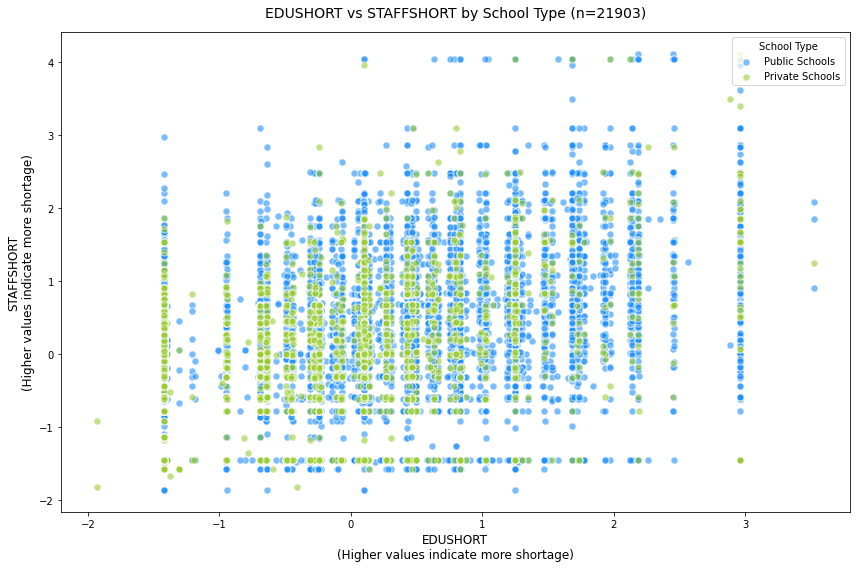

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# 选择两个连续型特征
x_feature = 'EDUSHORT'  # 教育资源短缺程度
y_feature = 'STAFFSHORT'  # 教职工短缺程度

# 按学校类型分组
public = df[df['PRIVATESCH'] == 'public']  # 公立学校
private = df[df['PRIVATESCH'] == 'private']  # 私立学校

# 绘制散点图
plt.figure(figsize=(12, 8))

# 公立学校散点
plt.scatter(
    public[x_feature], 
    public[y_feature], 
    color='dodgerblue', 
    label='Public Schools', 
    alpha=0.6,
    edgecolor='white',
    s=50
)

# 私立学校散点
plt.scatter(
    private[x_feature], 
    private[y_feature], 
    color='yellowgreen', 
    label='Private Schools', 
    alpha=0.6,
    edgecolor='white',
    s=50
)

plt.title(f'{x_feature} vs {y_feature} by School Type (n={len(df)})', fontsize=14, pad=15)
plt.xlabel(x_feature + '\n(Higher values indicate more shortage)', fontsize=12)
plt.ylabel(y_feature + '\n(Higher values indicate more shortage)', fontsize=12)
plt.legend(title='School Type', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

##### **Q2**
选择两个连续数值型特征，绘制其分布散点图，要求合理设置散点颜色和大小，并配上合适的标题和图例注记。

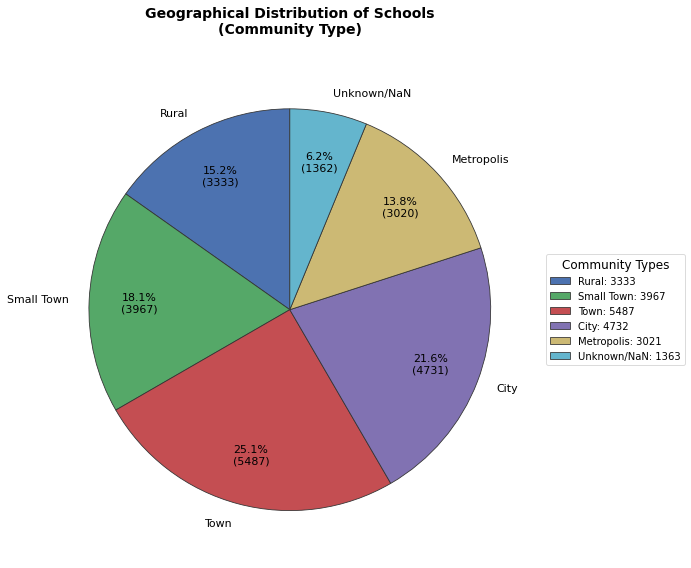

In [148]:
import matplotlib.pyplot as plt

feature = 'SC001Q01TA'
label_map = {1: "Rural", 2: "Small Town", 3: "Town", 4: "City", 5: "Metropolis", "Unknown": "Unknown/NaN"}

value_counts = df[feature].value_counts(dropna=False)
value_counts = value_counts.rename(lambda x: x if x in label_map else "Unknown").groupby(level=0).sum()

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']  # 高对比度配色
plt.figure(figsize=(12, 8), facecolor='white')

wedges, texts, autotexts = plt.pie(
    value_counts,
    labels=[label_map[idx] for idx in value_counts.index],
    colors=colors[:len(value_counts)],
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*value_counts.sum())})',
    startangle=90,
    pctdistance=0.75,
    wedgeprops={'edgecolor': '#333333', 'linewidth': 0.8},
    textprops={'fontsize': 11, 'color': 'black'}
)

plt.title(
    'Geographical Distribution of Schools\n(Community Type)', 
    fontsize=14, 
    pad=25,
    color='black',
    fontweight='bold'
)

plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

legend = plt.legend(
    wedges,
    [f"{label_map[idx]}: {count}" for idx, count in zip(value_counts.index, value_counts)],
    title="Community Types",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    title_fontsize=12,
    labelcolor='black',
    edgecolor='#d3d3d3'
)

plt.tight_layout()
plt.show()

##### **Q3**

对 T1-Q5 中的 Pearson 相关系数矩阵，绘制热力矩阵图，要求为每个位置增添对应数值表示（保留三位小数），设置数值与颜色的对应关系条，并配上合适的标题和坐标表示。

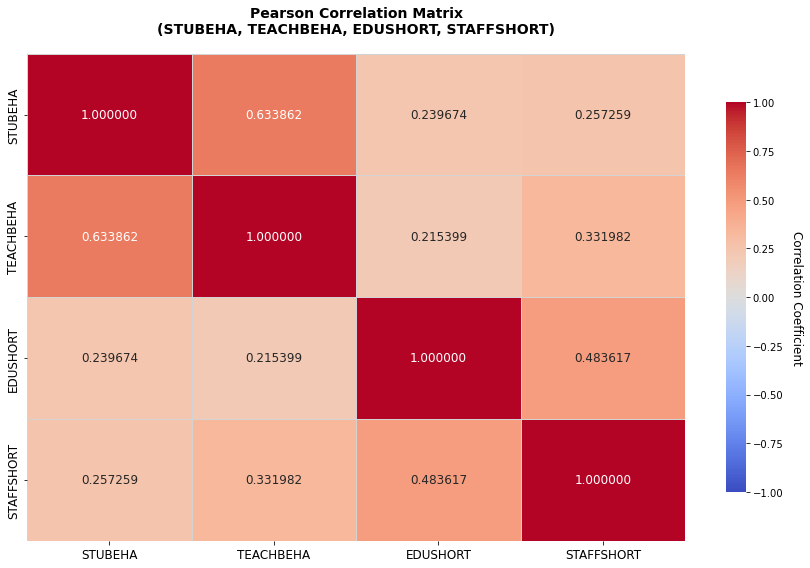

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制热力图
plt.figure(figsize=(12, 8), facecolor='white')

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".6f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='#d3d3d3',
    annot_kws={'size': 12},
    cbar_kws={'shrink': 0.8}
)

plt.title('Pearson Correlation Matrix\n(STUBEHA, TEACHBEHA, EDUSHORT, STAFFSHORT)', 
          fontsize=14, pad=20, color='black', fontweight='bold')
plt.xticks(fontsize=12, rotation=0, color='black')
plt.yticks(fontsize=12, rotation=90, color='black')

cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20, fontsize=12)
cbar.ax.tick_params(labelsize=10, colors='black')

plt.tight_layout()
plt.show()

### **PART 3**

现欲对数据集特征 `STUBEHA`, `TEACHBEHA` 进行分布校验。执行以下子表提取和缺失记录删除操作：
```python
df2 = df[['STUBEHA', 'TEACHBEHA']].dropna()
```
并基于 `df2` 完成以下任务：

##### **Q1**
以区间数为 10，分别绘制两个特征的频数直方图，基于频数直方图的结果，是否可以认为两特征近似服从正态分布？

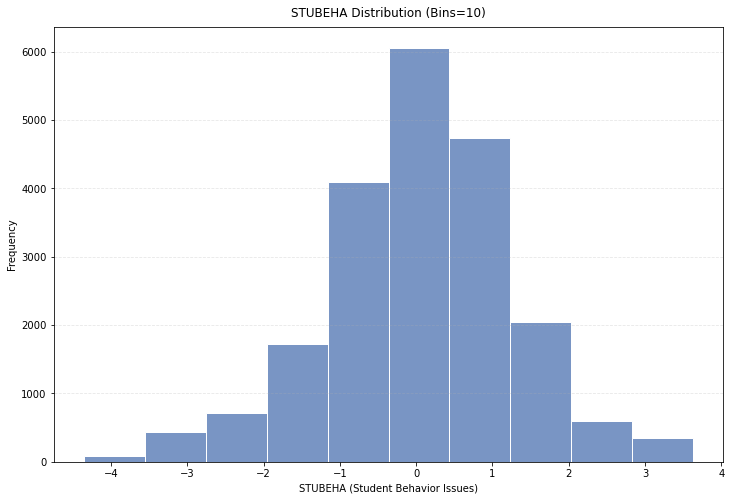

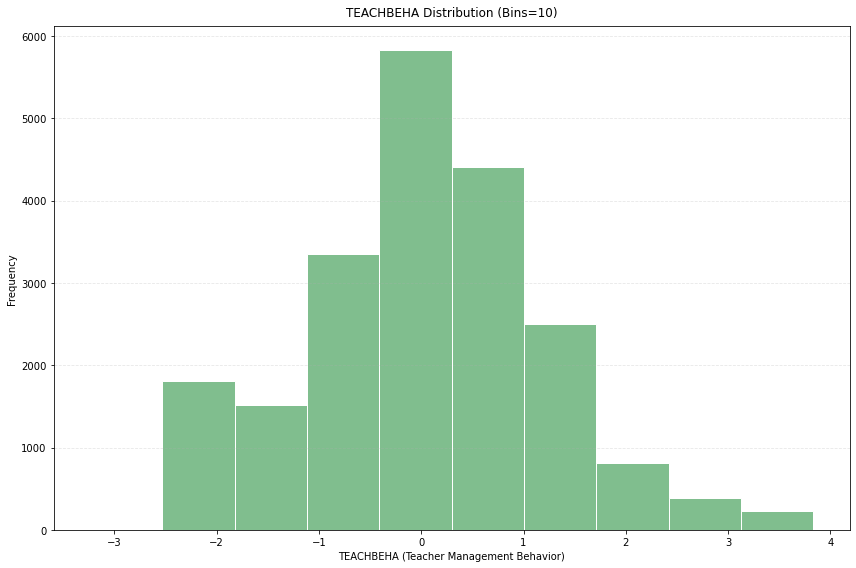

In [145]:
import matplotlib.pyplot as plt

df2 = df[['STUBEHA', 'TEACHBEHA']].dropna()

# STUBEHA 直方图
plt.figure(figsize=(12, 8), facecolor='white')
sns.histplot(df2['STUBEHA'], bins=10, color='#4C72B0', edgecolor='white', stat='count')
plt.title('STUBEHA Distribution (Bins=10)', fontsize=12, pad=10, color='black')
plt.xlabel('STUBEHA (Student Behavior Issues)', fontsize=10, color='black')
plt.ylabel('Frequency', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# TEACHBEHA 直方图
plt.figure(figsize=(12, 8), facecolor='white')
sns.histplot(df2['TEACHBEHA'], bins=10, color='#55A868', edgecolor='white', stat='count')
plt.title('TEACHBEHA Distribution (Bins=10)', fontsize=12, pad=10, color='black')
plt.xlabel('TEACHBEHA (Teacher Management Behavior)', fontsize=10, color='black')
plt.ylabel('Frequency', fontsize=10, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

可以认为两特征近似服从正态分布。

##### **Q2**
Q-Q 图（Quantile-Quantial Plot）又称为分位图，可简单直观地判断一组数据是否服从某种理论分布。例如，若一容量为 $n$ 的样本 $X$ 服从标准正态分布，则其各分位点应与标准正态分布对应分位点完全一致。若从标准正态分布抽样得到容量为 $n$ 的样本 $Y$，则散点 $(x_1,\ y_1),\ (x_2,\ y_2),\ ...\ ,\ (x_n,\ y_n)$ 将近似分布于直线 $y=x$ 上，其中 $x_1\leq x_2\leq ...\leq x_n,\ y_1\leq y_2\leq\ ...\leq y_n $。单个特征样本 Q-Q 图可通过以下代码绘制：
```python
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(data, line='45')
plt.show()
```
参考上述代码，分别绘制这两个特征样本的 Q-Q 图，基于 Q-Q 图的结果，是否可以认为两特征近似服从正态分布？将该结论与 Q1 所得结论进行对比，你有什么感想？

d:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

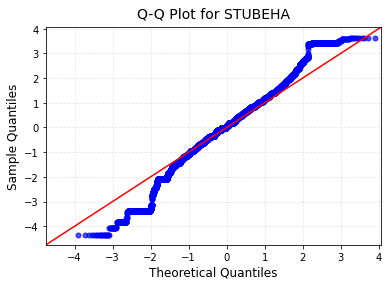

d:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 864x576 with 0 Axes>

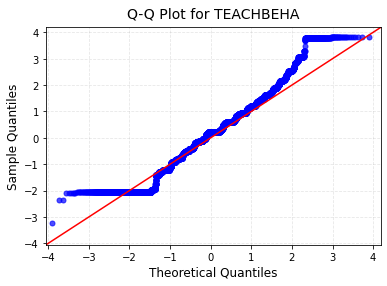

In [160]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# STUBEHA 的 Q-Q 图
plt.figure(figsize=(12, 8), facecolor='white')
sm.qqplot(df2['STUBEHA'], line='45', markersize=5, alpha=0.7)
plt.title('Q-Q Plot for STUBEHA', fontsize=14, pad=10, color='black')
plt.xlabel('Theoretical Quantiles', fontsize=12, color='black')
plt.ylabel('Sample Quantiles', fontsize=12, color='black')
plt.grid(linestyle='--', alpha=0.3)
plt.show()

# TEACHBEHA 的 Q-Q 图
plt.figure(figsize=(12, 8), facecolor='white')
sm.qqplot(df2['TEACHBEHA'], line='45', markersize=5, alpha=0.7)
plt.title('Q-Q Plot for TEACHBEHA', fontsize=14, pad=10, color='black')
plt.xlabel('Theoretical Quantiles', fontsize=12, color='black')
plt.ylabel('Sample Quantiles', fontsize=12, color='black')
plt.grid(linestyle='--', alpha=0.3)
plt.show()


判断两个特征是否吻合非常复杂，不能仅凭主观判断，需要通过绘制 Q-Q 图来进行验证。通过观察 Q-Q 图，可以看到这两个特征在中间部分与正态分布较为接近，但在两端有明显偏离。

##### **Q3**
特征 `STUBEHA` 与 `TEACHBEHA` 的理论分布是否具有一致性？请自行编写代码绘制两特征样本的 Q-Q 图和直线 $y=x$，并基于可视化结果简述你的发现。

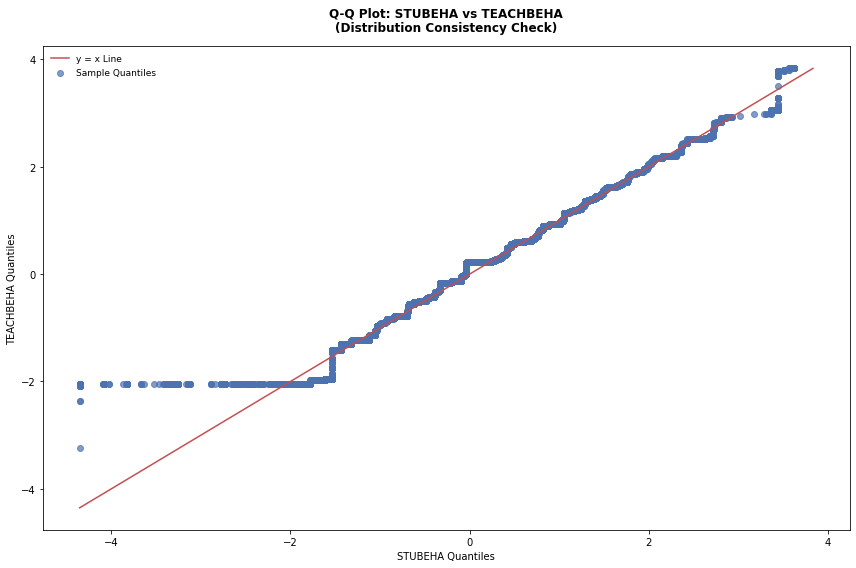

In [165]:
import matplotlib.pyplot as plt

# 计算分位数，生成分位点序列
n = len(df2)
q = np.linspace(0, 1, n)

# 对两列数据排序以获取分位数
stubeha_sorted = np.sort(df2['STUBEHA'])
teachbeha_sorted = np.sort(df2['TEACHBEHA'])

# 绘制 Q-Q 图
plt.figure(figsize=(12, 8), facecolor='white')
plt.scatter(
    stubeha_sorted, 
    teachbeha_sorted, 
    color='#4C72B0', 
    alpha=0.7,
    label='Sample Quantiles'
)

# y=x 参考线
min_val = min(stubeha_sorted.min(), teachbeha_sorted.min())
max_val = max(stubeha_sorted.max(), teachbeha_sorted.max())
plt.plot([min_val, max_val], [min_val, max_val], 
         color='#C44E52', linewidth=1.5, 
         label='y = x Line')

plt.title('Q-Q Plot: STUBEHA vs TEACHBEHA\n(Distribution Consistency Check)', 
         fontsize=12, pad=15, color='black', fontweight='bold')
plt.xlabel('STUBEHA Quantiles', fontsize=10, color='black')
plt.ylabel('TEACHBEHA Quantiles', fontsize=10, color='black')
plt.legend(frameon=False, fontsize=9)

plt.tight_layout()
plt.show()

由图可得特征 `STUBEHA` 和 `TEACHBEHA` 的理论分布具有一致性.

### **PART 4**
基于正态分布假设，对特征 `STUBEHA`, `TEACHBEHA` 的总体分布进行参数估计。

##### **Q1**
假设特征 `STUBEHA` 和 `TEACHBEHA` 样本分别独立同分布于正态分布 $N(\mu_1,\sigma_1^2)$, $N(\mu_2,\sigma_2^2)$，请分别求均值参数 $\mu_1,\ \mu_2$ 和方差参数 $\sigma_1^2,\ \sigma_2^2$ 的极大似然估计。作为总体均值和总体方差的估计，样本均值和样本方差均具有无偏性，请问上述极大似然估计是否也同样具有无偏性？

In [169]:
import numpy as np

def mle_normal_estimate(sample_data):
    sample_size = len(sample_data)
    mean_estimate = np.mean(sample_data)
    variance_estimate = np.sum((sample_data - mean_estimate)**2) / sample_size  # MLE for variance
    return mean_estimate, variance_estimate

mean_stu, var_stu = mle_normal_estimate(df2['STUBEHA'])
mean_tea, var_tea = mle_normal_estimate(df2['TEACHBEHA'])

print(f"1) Maximum Likelihood Estimate for STUBEHA: \nMean = {mean_stu:.4f}, \nVariance = {var_stu:.4f}")
print(f"\n2)Maximum Likelihood Estimate for TEACHBEHA: \nMean = {mean_tea:.4f}, \nVariance = {var_tea:.4f}")


1) Maximum Likelihood Estimate for STUBEHA: 
Mean = 0.0411, 
Variance = 1.5289

2)Maximum Likelihood Estimate for TEACHBEHA: 
Mean = 0.1082, 
Variance = 1.3413


均值的极大似然估计：无偏；

方差的极大似然估计：有偏。

##### **Q2**
设特征 `STUBEHA` 的样本为 $Y=(y_1,\ y_2,\ ...\ y_n)$，对该特征进行常数估计 $y=a$，求参数 $a$ 的最小二乘解，并比较其与 Q1 中所得总体均值极大似然估计的结果。

ANS：

我们要求解常数估计 $ y = a $ 的最小二乘解，问题为：

$$
a = \argmin \sum_{i=1}^{n} (y_i - a)^2
$$

通过展开二次项，我们得到：

$$
a = \argmin \left( n a^2 - 2a \sum_{i=1}^{n} y_i + \sum_{i=1}^{n} y_i^2 \right)
$$

对这个关于 $ a $ 的二次函数求导，即可得到最小值位置

$$
\frac{d}{da} \left( n a^2 - 2a \sum_{i=1}^{n} y_i + \sum_{i=1}^{n} y_i^2 \right) = 0
$$

对 $ a $ 求导后得到：

$$
2n a - 2 \sum_{i=1}^{n} y_i = 0
$$

解得：

$$
a = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

因此，最小二乘法的常数估计解 $ a $ 为样本均值。

在 Q1 中，通过极大似然估计得到的均值 $ \hat{\mu}_1 $ 为：

$$
\hat{\mu}_1 = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

这与最小二乘解 $ a $ 相同。因此通过最小二乘法得到的常数估计 $ a $ 等于样本均值 $ \displaystyle{\frac{1}{n} \sum_{i=1}^{n} y_i} $，这一结果与在 Q1 中通过极大似然估计得到的均值 $ \hat{\mu}_1 $ 完全一致。



### **PART 5**
基于 T4 的假设，现需对特征 `STUBEHA`, `TEACHBEHA` 的总体均值差异进行检验。请阅读本文档的内容，并导入 `scipy` 库，完成以下任务：

##### **Q1**
简述本情景下应使用成组检验还是成对检验，并写出单侧检验原假设。

ANS：

特征 `STUBEHA` 和 `TEACHBEHA` 的对象是同一个学校，只是指标针对的方向不同。是成对出现的, 因此使用成组检验。

单侧检验原假设: $H_0: \mu_S = \mu_T \leftrightarrow H_1: \mu_S < \mu_T$

##### **Q2**
使用 `scipy.stats` 中的相关方法，执行相应的假设检验。

In [172]:
from scipy.stats import ttest_rel

student_data = df2['STUBEHA']
teacher_data = df2['TEACHBEHA']

t_stat, p_value = ttest_rel(student_data, teacher_data)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -9.420646242610308
P-value: 4.936494108774419e-21


##### **Q3**
基于 Q2 所得结果，请仔细斟酌并叙述你所得到的结论。

In [173]:
print(df2['STUBEHA'].count())
print(df2['TEACHBEHA'].count())

20844
20844


两个属性均有 20844 条数据。我们根据 Q2 的结果，采用双样本 t 检验：
$$
T = \frac{\overline{X} - \overline{Y}}{S_w \sqrt{\frac{1}{m} + \frac{1}{n}}}
$$
其中：$\overline{X}$, $\overline{Y}$ 为样本均值，$S_w$ 为合并标准差，$m$, $n$ 为两样本容量。当满足拒绝条件：
$$
T < -t_{\infty}(\alpha) \quad (\alpha = 0.05\ 时临界值 \approx -1.645)
$$
则拒绝原假设 $H_0: \mu_S \geq \mu_T$。

##### **Q4**
上述结论隐含了犯哪一类错误的可能？相应犯错概率是多少？

ANS:

存在犯第一类错误的风险，但其发生的概率不超过 5%。